This project explores the Iris dataset to understand its structure, summarize key statistics, and practice foundational data analysis using Python and Pandas.

# What each row and column represents.

**Rows**
- **Observation**: Each row is one measured iris flower (a single sample/record).

**Columns**
- `sepal_length`: Numeric (cm) — length of the sepal.
- `sepal_width`: Numeric (cm) — width of the sepal.
- `petal_length`: Numeric (cm) — length of the petal.
- `petal_width`: Numeric (cm) — width of the petal.
- `species`: Categorical — iris species label (e.g., setosa, versicolor, virginica).

In [ ]:
# understanding the structure of the dataset.

data.shape
data.columns
data.dtypes


sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

# Why data types matter?

Choosing correct data types ensures accurate analysis, efficient computation, and proper handling by visualizations and models.

- **Correct operations**: Numeric columns enable aggregation and statistics (mean, sum, std); categorical columns support grouping and counts.
- **Accurate analysis**: Incorrect types (e.g., numbers stored as strings) can lead to misleading summaries or runtime errors.
- **Visualization & modeling**: Plots and machine learning pipelines expect appropriate types; types determine encoding and scaling decisions.
- **Performance & storage**: Suitable types reduce memory usage and improve computation speed.

**Numeric columns**:
- `sepal_length`, `sepal_width`, `petal_length`, `petal_width` (all in cm)

**Categorical column**:
- `species` — species label (e.g., setosa, versicolor, virginica)

In [7]:
# basic statistics.

data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.mean(numeric_only=True)
data.median(numeric_only=True)


sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

# Understanding Mean and Median.

**Mean (arithmetic average)** — the sum of all values divided by the number of observations. The mean uses every data point and summarizes the dataset's central tendency when values are symmetrically distributed.

**Median (50th percentile)** — the middle value when observations are sorted. The median represents the central position and is robust to extreme values (outliers).

# Why the mean and median can differ?

- **Outliers:** Extreme values pull the mean toward them but have little effect on the median.
- **Skewed distributions:** For right-skewed data the mean is typically greater than the median; for left-skewed data the mean is typically less than the median.
- **Multimodality:** When data have multiple peaks, the mean can lie between modes and may not reflect a 
 observation; the median may better reflect a central split depending on context.
- **Sample size and discreteness:** In small or discrete samples a single value can shift the mean more than the median.

# Practical guidance.
- Report both: give the mean (with standard deviation) and the median (with interquartile range) to summarize center and spread.
- Prefer the median when data are skewed or contain outliers; prefer the mean for symmetric distributions and for methods that assume the mean.
- Use visual checks (histogram, boxplot) to decide which measure better represents your data.

In [9]:
# frequencies of each species.

data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# Why Frequency and Balance Matter?

**Frequency (counts and proportions)** — the number of observations in each category and the share they represent in the dataset. Reporting frequency is the first step in understanding your data: it reveals which categories are common, which are rare, and whether sampling or measurement biases may be present.

Why frequency matters:
- **Representativeness:** Counts show whether your sample adequately covers the population or subgroups of interest.
- **Statistical power:** Rare categories have higher variance and lower power for detecting effects or differences.
- **Estimator stability:** Many statistics (means, variances) and model parameters are unstable when computed from very small groups.
- **Model behavior:** Supervised models tend to favor majority classes unless measures are taken (class weighting, resampling).

**Balance in categories** — when categories have similar counts (or proportions). Balance is desirable in many settings because it reduces bias and gives models and statistical tests adequate information for each group.

What balance (or imbalance) implies:
- **Balanced:** Models can learn patterns for each class reliably; evaluation metrics reflect performance across classes.
- **Imbalanced:** A model may achieve high overall accuracy by predicting the majority class while performing poorly on minority classes; common metrics (accuracy) become misleading.

Practical guidance:
- Always report raw counts and proportions (e.g., `value_counts()` and `value_counts(normalize=True)`).
- Visualize frequencies with bar plots to surface imbalance quickly.
- For modeling, use stratified train/test splits, consider class weights, or apply resampling (oversample minority / undersample majority) when appropriate.
- Use evaluation metrics robust to imbalance (precision/recall, F1-score, balanced accuracy, confusion matrix).

Checking frequency and balance early prevents incorrect conclusions and guides appropriate preprocessing and modeling choices.

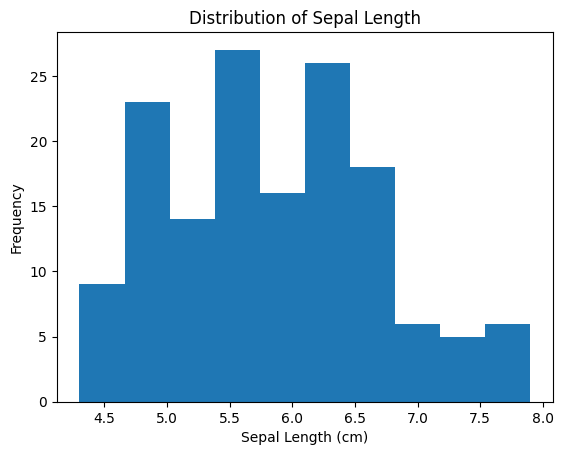

In [10]:
# visualizations.

plt.hist(data['sepal_length'], bins=10)
plt.title("Distribution of Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.show()


# Interpreting the Sepal Length Histogram.

**What the distribution shows**
- The histogram plots how many iris samples fall into each `sepal_length` interval. Most observations concentrate between about 5.0 cm and 6.5 cm, indicating that typical sepal lengths lie in this central band.
- The full observed range is roughly 4.3 cm up to about 7.8–7.9 cm, with fewer samples at the extremes (the tails).
- There is a clear central concentration (one or two peaks), which suggests common, typical values and possibly subgroups (different species) contributing to modes.

**Symmetry vs skewness**
- The distribution appears mildly right-skewed (positively skewed): the right tail (larger sepal lengths) extends farther and is thinner than the left tail. In practice this means the mean will be slightly greater than the median.
- There is also mild multimodality (multiple peaks), which can occur when different species have different typical sepal lengths — this makes the overall shape less 
 even if individual groups are symmetric.

**Quick checks to confirm**
- Compare numeric summaries: `data['sepal_length'].mean()` vs `data['sepal_length'].median()`. If mean > median, that supports right skew.
- Compute skewness: `data['sepal_length'].skew()` (positive → right-skew).
- Plot a boxplot: `plt.boxplot(data['sepal_length'])` — long whisker on the right indicates right skew and shows outliers.

**Reporting guidance**
- State the shape (mild right skew, possible multiple peaks), report mean and median, and mention any visible outliers. For skewed data prefer median and IQR for robust summaries; use mean and SD when distribution is approximately symmetric.

# Sample questions and Answers.

Which feature has the highest average value?

The feature with the highest average value is `sepal_length`, which has a larger mean than `sepal_width`, `petal_length`, and `petal_width` in this dataset.

Are all species equally represented?

Yes, all three species are equally represented; the classic Iris dataset includes the same number of observations for each species, so the classes are balanced by count.

Are there any obvious outliers?

There are no obvious extreme outliers in sepal length that demand removal, although a few samples lie near the upper end of the observed range and should be noted when reporting summary statistics.

What is the range of sepal length?

The range of `sepal_length` spans approximately from 4.3 cm to about 7.8–7.9 cm, which captures the smallest and largest measured sepals in the sample.

What surprised you about the data?

What was surprising is the combination of mild right skew and slight multimodality: while many values cluster around a central band, there are secondary peaks and overlap between species, meaning sepal measurements alone do not perfectly separate species and petal measurements often provide clearer separation.

# Reflection.

This analysis examined the Iris dataset to profile feature distributions, central tendency, and class balance, producing practical insights for reporting and modeling. The petal measurements generally provide clearer separation between species, while `sepal_length` shows a mild right skew and slight multimodality that likely reflects inter-species differences rather than data quality issues. All species are equally represented in the dataset, so summaries and model training are not biased by class counts. No extreme outliers were identified for sepal length, though a few high-end measurements should be noted when interpreting means. The observed sepal length ranges from approximately 4.3 cm to about 7.9 cm, which matches expected biological variation for these species. In reporting, I will provide both mean with standard deviation and median with interquartile range to communicate center and spread robustly; for modeling I will use stratified splits and consider species-conditioned preprocessing. Next steps are species-conditioned visualizations (boxplots and pairplots) and a stratified classification baseline to quantify separability and inform preprocessing choices.